In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pandas.read_csv('../Datasets/bike.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Columns
***weathersit***

    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

NA *ordinal* ***instant***: record index 

NA *ordinal* ***dteday***: date

NA *category* ***season***: season (1:spring, 2:summer, 3:fall, 4:winter)

NA *category* ***yr***: year (0: 2011, 1:2012)

NA *category* ***mnth***: month ( 1 to 12)

*category* ***holiday***: whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday- schedule)

NA *category* ***weekday***: day of the week

*category* ***workingday***: if the day is a regular day of work it is coded as 1, weekends or holidays are coded as 0.

*numerical* ***temp***: Normalized temperature in Celsius. The values are divided by 41 (max)

*numerical* ***atemp***: Normalized feeling temperature in Celsius. The values are divided by 50 (max)

*numerical* ***hum***: Normalized humidity. The values are divided by 100 (max)

*numerical* ***windspeed***: Normalized wind speed. The values are divided by 67 (max)

*numerical* ***casual***: count of casual users

*numerical* ***registered***: count of registered users

*numerical* ***cnt***: count of total rental bikes including both casual and registered users

NA: We're not analysing those variables alone

https://rstudio-pubs-static.s3.amazonaws.com/98994_613e4a13f448452c937233f146f80d59.html

In [33]:
toAnalyse = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [29]:
def stats(x):
    r = x.describe().to_dict()
    r['IQR'] = r['75%'] - r['25%']
    r['minN'] = r['25%'] - r['IQR']*1.5
    r['maxN'] = r['75%'] + r['IQR']*1.5
    return r

In [34]:
for c in toAnalyse:
    print('\n\t', c)
    print(stats(df[c]))


	 temp
{'count': 731.0, 'mean': 0.49538478850889184, 'std': 0.18305099611148867, 'min': 0.0591304, '25%': 0.3370835, '50%': 0.498333, '75%': 0.6554165000000001, 'max': 0.861667, 'IQR': 0.3183330000000001, 'minN': -0.14041600000000015, 'maxN': 1.1329160000000003}

	 atemp
{'count': 731.0, 'mean': 0.47435398864569067, 'std': 0.16296117838631127, 'min': 0.0790696, '25%': 0.3378425, '50%': 0.486733, '75%': 0.6086020000000001, 'max': 0.840896, 'IQR': 0.2707595000000001, 'minN': -0.06829675000000018, 'maxN': 1.0147412500000002}

	 hum
{'count': 731.0, 'mean': 0.6278940629274962, 'std': 0.14242909513835394, 'min': 0.0, '25%': 0.52, '50%': 0.626667, '75%': 0.7302085, 'max': 0.9725, 'IQR': 0.21020850000000002, 'minN': 0.20468725, 'maxN': 1.0455212500000002}

	 windspeed
{'count': 731.0, 'mean': 0.1904862116279068, 'std': 0.07749787068166943, 'min': 0.0223917, '25%': 0.13495, '50%': 0.180975, '75%': 0.2332145, 'max': 0.507463, 'IQR': 0.0982645, 'minN': -0.012446750000000034, 'maxN': 0.38061125}

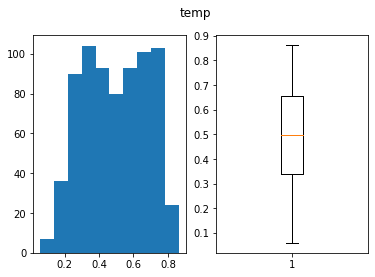

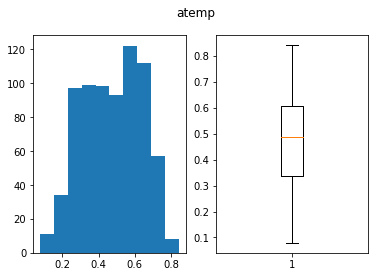

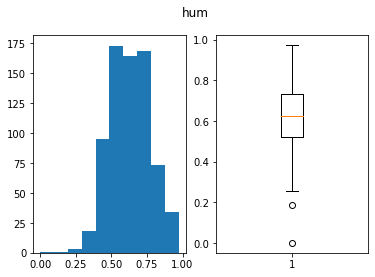

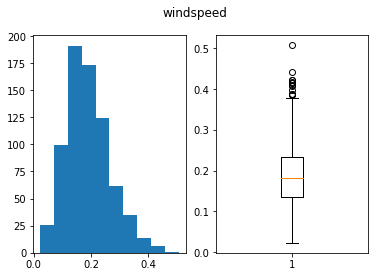

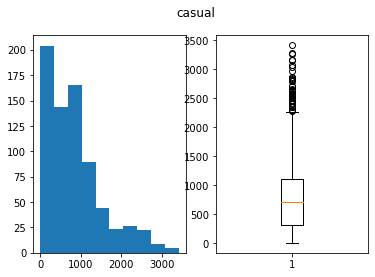

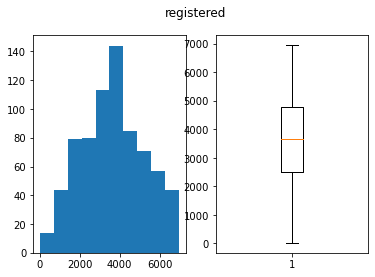

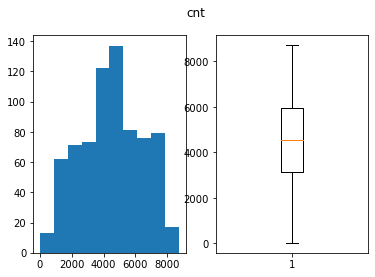

In [46]:
for i, feature in enumerate(toAnalyse):
    plt.figure()
    plt.suptitle(feature)
    plt.subplot(1, 2, 1)
    plt.hist(df[feature].values)
    plt.subplot(1, 2, 2)
    plt.boxplot(df[feature].values)
    plt.show()

In [69]:
dfAnalysis = df[toAnalyse]
dfC = dfAnalysis.corr()
dfAbs = pandas.DataFrame(np.round(np.abs(dfC.values), 2), index = dfC.index, columns = dfC.columns)

In [70]:
dfAbs

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.00,0.99,0.13,0.16,0.54,0.54,0.63
atemp,0.99,1.00,0.14,0.18,0.54,0.54,0.63
hum,0.13,0.14,1.00,0.25,0.08,0.09,0.10
windspeed,0.16,0.18,0.25,1.00,0.17,0.22,0.23
casual,0.54,0.54,0.08,0.17,1.00,0.40,0.67
registered,0.54,0.54,0.09,0.22,0.40,1.00,0.95
cnt,0.63,0.63,0.10,0.23,0.67,0.95,1.00


<AxesSubplot:>

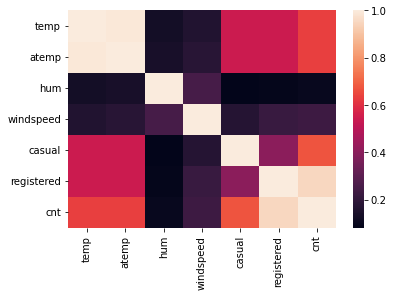

In [71]:
sns.heatmap(dfAbs)